# Imports

In [58]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import prettyplotlib as ppl
import matplotlib.pyplot as plt
%matplotlib inline

# Convenience functions

In [22]:
def add_ts(df, col='Date '):
    dates = [] 
    for i in range(len(df[col].values)):
        dates.append(df[col][i].value)
    df['timestamp'] = pd.Series(dates)

def nice_time(serie, start):
    serie = (serie-start)/1e9
    serie = serie/86400
    return serie

# Loading the datasets
The dataset come from the meetup.com website, and google analytics.

In [35]:
group_join_db = pd.read_csv("Epidemium_Groups_Joins.tsv", sep='\t')
page_contrib_db = pd.read_csv("Epidemium_page_contrbution_db_ts.tsv", sep='\t')
rsvp_db = pd.read_csv("Epidemium_RSVPs.tsv", sep='\t')
active_mb_db = pd.read_csv("Epidemium_Total_and_Active_Members.tsv", sep='\t')

In [24]:
analytics = {}
f = open("Analytics WWW Epidemium Présentation de l'audience 20150901-20161211.tsv")
for line in f.readlines()[1:]:
    s = line.strip().split('\t')
    if len(s[0].split('/')) == 3:
        if s[0] not in analytics:
            analytics[s[0]] = [0,0,0]
        analytics[s[0]][0] = int(s[1])

f = open("Analytics Wiki Epidemium Présentation de l'audience 20150901-20161211.tsv")
for line in f.readlines()[1:]:
    s = line.strip().split('\t')
    if len(s[0].split('/')) == 3:
        if s[0] not in analytics:
            analytics[s[0]] = [0,0,0]
        analytics[s[0]][1] = int(s[1])
        
f = open("Analytics QA Epidemium Présentation de l'audience 20150901-20161211.tsv")
for line in f.readlines()[1:]:
    s = line.strip().split('\t')
    if len(s[0].split('/')) == 3:
        if s[0] not in analytics:
            analytics[s[0]] = [0,0,0]
        analytics[s[0]][2] = int(s[1])

# Cleaning and transforming the data
Most of the dates are not timestamps or datetime object.

In [25]:
df = pd.DataFrame.from_dict(analytics, orient='index')
df.index = df.index.to_datetime("%d/%m/%Y")
df = df.sort_index()
df.columns = ['WWW','Wiki','QA']
df['Day'] = df.index.values
ts = []
for i in range(len(df)):
    ts.append(df['Day'][i].value)
df['timestamp'] = ts
analytics = df

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


In [26]:
toparse = u"""2015/10/6 - Meetup "Ethique et Data de santé" - 36
2015/10/15 - Meetup "Le Traitement des données de santé, enjeux et réalités" - 60
2015/11/5 - Soirée de lancement du Challenge4Cancer - 47
2015/11/12 - Meetup "Les modèles d’épidémies sur base de données mobiles" - 72
2015/11/24 - Meetup "Prédire la survie des cancers du poumon de stade précoce" - 38
2015/12/15 - Meetup "Open data en cancérologie : un cas pratique" - 63
2016/01/14 - Bocal #2 "Développer, faire progresser, documenter vos projets" - 17
2016/01/21 - Meetup "Open data en santé : enjeux et débat" - 44
2016/02/04 - Meetup Que se cache-t-il derrière cette ère de l'Open (Big Data, Science etc.) ? - 87
2016/02/13 - RAMP : Rapid Analytics and Model Prototyping - 31
2016/02/18 - Meetup Analyse des résultats de la RAMP - 9
2016/02/25 - Bocal Oncologie et épidémiologie - 17
2016/03/01 - Meetup "Un Google 3.0 du cancer : est-ce possible ?" - 156
2016/03/17 - Meetup "À la découverte de la data science" + étude de cas oncologie - 76
2016/04/07 - Meet-up "Premières réalisations de la communauté Epidemium" - 22
2016/04/14 - Meetup "Méthodes de travail collaboratif 3.0" - 36
2016/04/30 - RAMP 2 (Rapid Analytics and Model Prototyping) - 24
2016/05/19 - Meetup & Workshop in writing collaborative scientific articles with Authorea - 19"""
meetup_time = []
for line in toparse.split('\n'):
#     printline
    meetup_time.append([line.strip().split(' - ')[0],line.strip().split(' - ')[2]])
meetup_db = pd.DataFrame(meetup_time, columns=['Dates','nb_people'])
meetup_db['nb_people'] = meetup_db['nb_people'].astype(int)

In [27]:
group_join_db['Date '] = pd.to_datetime(group_join_db['Date '])
rsvp_db['Date ']= pd.to_datetime(rsvp_db['Date '])
active_mb_db['Date ']= pd.to_datetime(active_mb_db['Date '])
page_contrib_db['Timestamp'] = pd.to_datetime(page_contrib_db['Timestamp'])
meetup_db['Dates'] = pd.to_datetime(meetup_db['Dates'])
add_ts(group_join_db)
add_ts(rsvp_db)
add_ts(active_mb_db)
add_ts(page_contrib_db, col='Timestamp')
add_ts(meetup_db, col='Dates')
# analytics_www_db['Index des jours'] = analytics_www_db['Day Index']

In [28]:
start = pd.to_datetime('2015/11/05 00:00:00').value
stop = pd.to_datetime('2016/05/06 00:00:00').value
f = open('start_stop_ts','w')
f.write('start\t'+str(start)+'\n')
f.write('stop\t'+str(stop))

24

# Temporal Activity of members

## On the Meetup group

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.4/dist-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


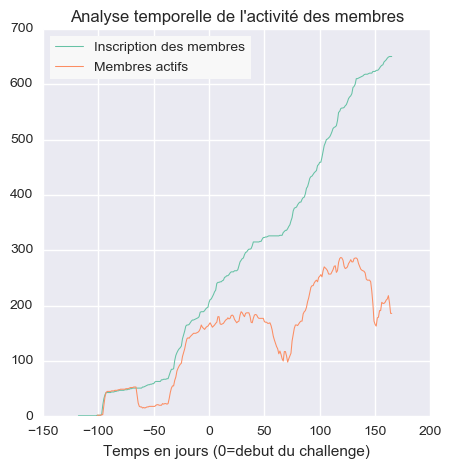

In [30]:
fig = sns.plt.figure(figsize=(5,5), dpi=300)
y = group_join_db['Inscriptions des membres'].cumsum().values
x = nice_time(group_join_db['timestamp'].values, start)
ppl.plot(x,y, label='Inscription des membres')
# y = rsvp_db['Confirmations de participation (RSVP)'].cumsum().values
# x = nice_time(rsvp_db['timestamp'].values, start)
# ppl.plot(x,y, label='Confirmation de participation')
y = active_mb_db['Membres actifs'].values
x = nice_time(active_mb_db['timestamp'].values, start)
ppl.plot(x,y, label='Membres actifs')

ppl.legend(loc=2)
# sns.plt.xlim(90)
sns.plt.xlabel('Temps en jours (0=debut du challenge)')
sns.plt.title("Analyse temporelle de l'activité des membres")
fig.savefig('time_serie_members.svg', dpi=300)

## On the different plateform

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.4/dist-packages/matplotlib/legend.py:297: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  reps)[:self.scatterpoints]


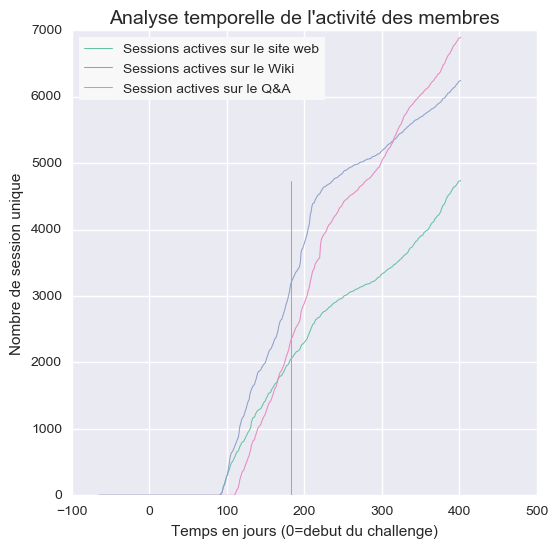

In [31]:
fig = sns.plt.figure(figsize=(6,6), dpi=300)

y = analytics['WWW'].cumsum().values
x = nice_time(analytics['timestamp'].values, start)
ppl.plot(x,y, label='Sessions actives sur le site web')

x1 = nice_time(np.array([stop, stop]), start)
ppl.plot(x1, [0, max(y)])

y = analytics['Wiki'].cumsum().values
# x = nice_time(analytics_wiki_db['timestamp'].values, start)
# print(y)
ppl.plot(x,y, label='Sessions actives sur le Wiki')

y = analytics['QA'].cumsum().values/2
# x = nice_time(analytics_qa_db['timestamp'].values, start)
ppl.plot(x,y, label='Session actives sur le Q&A')

ppl.legend(loc=2)
sns.plt.ylabel('Nombre de session unique')
sns.plt.xlabel('Temps en jours (0=debut du challenge)')
sns.plt.title("Analyse temporelle de l'activité des membres", size=14)
# fig.savefig('time_serie_plateforms.svg', dpi=300)

# Correlation analysis between the different plateforms

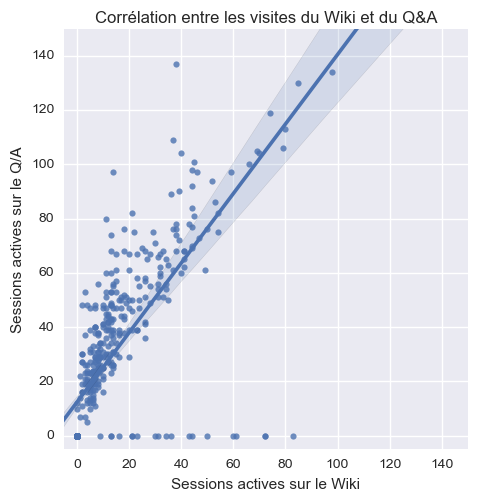

In [32]:
fig = sns.lmplot(x='Wiki',y='QA', data=analytics, fit_reg=True)
fig.figsize = (3,3)
sns.plt.xlabel("Sessions actives sur le Wiki")
sns.plt.ylabel("Sessions actives sur le Q/A")
sns.plt.xlim(-5,150)
sns.plt.ylim(-5,150)
sns.plt.title("Corrélation entre les visites du Wiki et du Q&A")
fig.savefig("Wiki_and_QA_visit_correlation.svg", dpi=300)

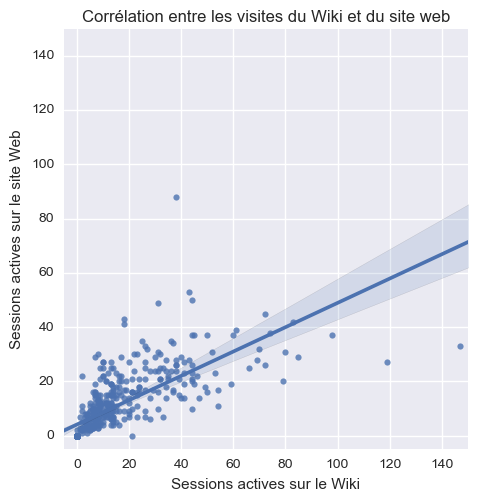

In [33]:
fig = sns.lmplot(x='Wiki',y='WWW', data=analytics, fit_reg=True)
fig.figsize = (3,3)
sns.plt.xlabel("Sessions actives sur le Wiki")
sns.plt.ylabel("Sessions actives sur le site Web")
sns.plt.xlim(-5,150)
sns.plt.ylim(-5,150)
sns.plt.title("Corrélation entre les visites du Wiki et du site web")
fig.savefig("Wiki_and_WWW_visit_correlation.svg", dpi=300)

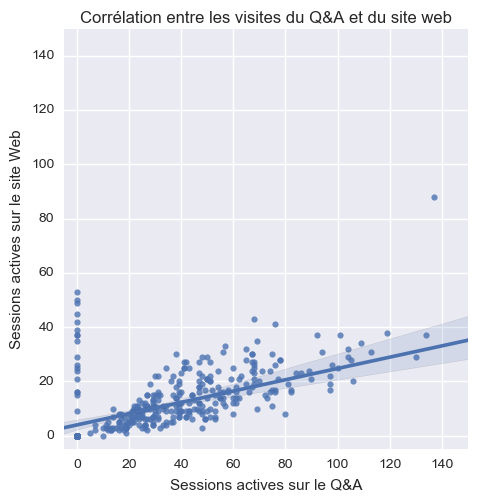

In [34]:
fig = sns.lmplot(x='QA',y='WWW', data=analytics, fit_reg=True)
fig.figsize = (3,3)
sns.plt.xlabel("Sessions actives sur le Q&A")
sns.plt.ylabel("Sessions actives sur le site Web")
sns.plt.xlim(-5,150)
sns.plt.ylim(-5,150)
sns.plt.title("Corrélation entre les visites du Q&A et du site web")
fig.savefig("Q&A_and_WWW_visit_correlation.svg", dpi=300)

# Analysis of members in each teams

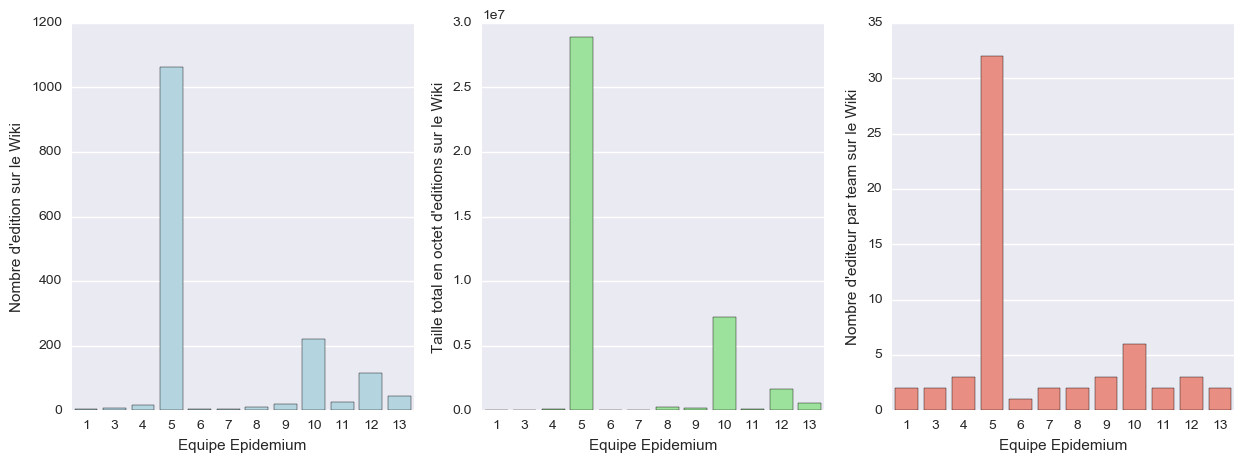

In [83]:
page_contrib_db = page_contrib_db[page_contrib_db['TeamID'] != 0]
group = page_contrib_db.groupby('TeamID')
# group['TID'] = 
count = group.count()
summed = group.sum()
count['nuser'] = group.UserID.nunique()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
sns.barplot(ax=ax, data=count, x=list(group.groups.keys()), y='UserID', color="lightblue")
ax.set_xlabel("Equipe Epidemium")
ax.set_ylabel("Nombre d'edition sur le Wiki")
ax = fig.add_subplot(132)
sns.barplot(ax=ax, data=summed, x=list(group.groups.keys()), y='ByteSize', color="lightgreen")
ax.set_xlabel("Equipe Epidemium")
ax.set_ylabel("Taille total en octet d'editions sur le Wiki")
ax = fig.add_subplot(133)
sns.barplot(ax=ax, data=count, x=list(group.groups.keys()), y='nuser', color="salmon")
ax.set_xlabel("Equipe Epidemium")
ax.set_ylabel("Nombre d'editeur par team sur le Wiki")
fig.savefig('Figure_5.svg')